In [1]:
# Dependencies

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pylab as plt
%matplotlib inline

font = {'size'   : 14}

plt.rc('font', **font)

In [2]:
# Import modules for feature engineering and modelling
from sklearn.model_selection import train_test_split  # not used here, split based on provider
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# for integer encoding using sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve  


from sklearn.metrics import precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

from sklearn.metrics import auc,plot_precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

from sklearn.metrics import roc_curve,auc,RocCurveDisplay

from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay


import xgboost as xgb
from sklearn.svm import SVC

# Set seed for reproducibility
seed1, seed2, seed3=101,67, 42

## Load and Merge Data

In [3]:
# load the data from csv to pandas dataframe
X_test_aggregated_raw = pd.read_csv("output/agg_train_test_split/X_test_0809.csv")
X_train_aggregated_raw = pd.read_csv("output/agg_train_test_split/X_train_0809.csv")
y_test_aggregated_raw = pd.read_csv("output/agg_train_test_split/y_test_0809.csv")
y_train_aggregated_raw = pd.read_csv("output/agg_train_test_split/y_train_0809.csv")

In [4]:
y_train_aggregated_raw

,PotentialFraud
0,0
1,0
2,0
3,0
4,0
...,...
4323,0
4324,0
4325,0
4326,0


In [5]:
X_train_aggregated_raw

,Provider,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,OPAnnualDeductibleAmt_max,...,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac
0,PRV53960,2.452381,200.0,12.000000,12.000000,3279.214286,43330,1377270,902.166667,9180,...,0.480952,0.085714,0.242857,0.426190,0.719048,0.773810,0.357143,0.316667,0.040476,0.016667
1,PRV52517,3.750000,70.0,11.625000,12.000000,2082.500000,6110,66640,537.500000,1530,...,0.375000,0.187500,0.281250,0.343750,0.593750,0.781250,0.218750,0.625000,0.062500,0.000000
2,PRV55652,1.785714,50.0,12.000000,12.000000,1757.500000,9840,49210,500.357143,3110,...,0.178571,0.107143,0.285714,0.535714,0.714286,0.785714,0.392857,0.321429,0.071429,0.000000
3,PRV57328,4.473684,70.0,12.000000,12.000000,1498.157895,7400,56930,465.789474,1550,...,0.342105,0.105263,0.236842,0.394737,0.500000,0.631579,0.342105,0.263158,0.078947,0.052632
4,PRV56721,4.059406,100.0,11.915842,11.881188,2032.673267,24260,410600,599.900990,6300,...,0.430693,0.158416,0.356436,0.485149,0.643564,0.722772,0.321782,0.232673,0.084158,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4323,PRV52471,12.500000,100.0,12.000000,12.000000,1482.500000,3100,11860,806.250000,1850,...,0.250000,0.125000,0.250000,0.500000,0.750000,0.875000,0.250000,0.375000,0.125000,0.000000
4324,PRV55316,2.923077,100.0,12.000000,12.000000,1804.461538,9920,117290,436.461538,1940,...,0.415385,0.184615,0.230769,0.384615,0.738462,0.846154,0.153846,0.261538,0.061538,0.000000
4325,PRV52671,0.000000,0.0,12.000000,12.000000,2605.000000,4610,5210,500.000000,720,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.500000,0.500000,0.000000
4326,PRV56782,1.770833,100.0,11.875000,11.965278,2982.951389,22730,859090,681.250000,5010,...,0.305556,0.166667,0.322917,0.583333,0.781250,0.697917,0.402778,0.343750,0.111111,0.003472


## Basic Transformation

In [6]:
y_train=y_train_aggregated_raw['PotentialFraud']
y_test=y_test_aggregated_raw['PotentialFraud']

X_train=X_train_aggregated_raw.drop('Provider',axis=1).fillna(0)
X_test=X_test_aggregated_raw.drop('Provider',axis=1).fillna(0)

In [7]:
xgb_cl = xgb.XGBClassifier()

classification_models={
    'LogisticRegression':LogisticRegression(class_weight = 'balanced',random_state=seed1,max_iter=10000),
    'RandomForest':RandomForestClassifier(n_estimators = 5, random_state = seed1),
    'XGBClassifier':xgb.XGBClassifier(n_estimators = 5,random_state = seed1),
    'SVC': SVC(kernel='linear',probability=True,random_state=seed1)
}

## Logistic Regression


>>>>>>>>>>>>>>>>>>>>>>>>>>LogisticRegression model results <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3925
           1       0.47      0.92      0.62       403

    accuracy                           0.90      4328
   macro avg       0.73      0.91      0.78      4328
weighted avg       0.94      0.90      0.91      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      0.89      0.93       979
           1       0.45      0.87      0.59       103

    accuracy                           0.89      1082
   macro avg       0.72      0.88      0.76      1082
weighted avg       0.93      0.89      0.90      1082



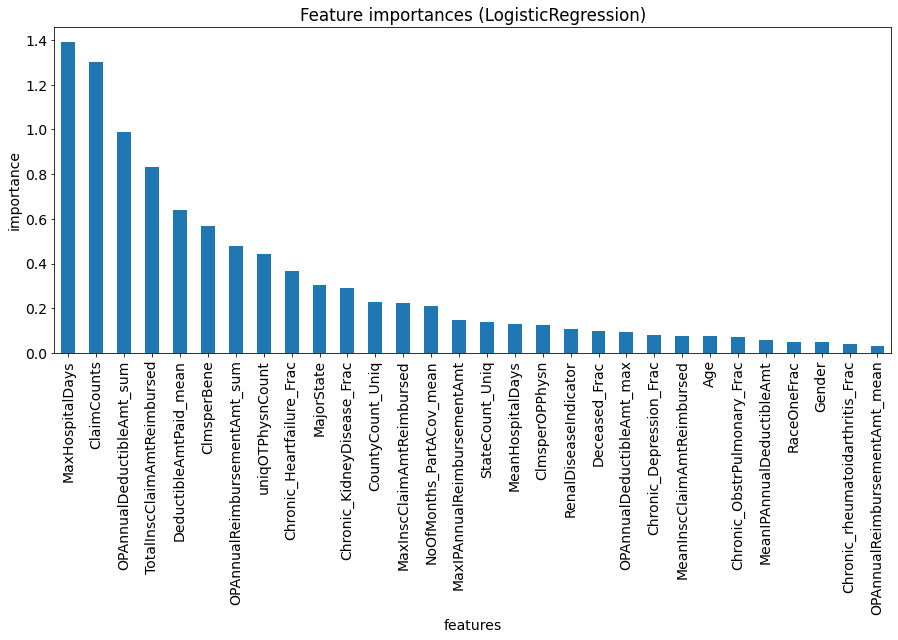

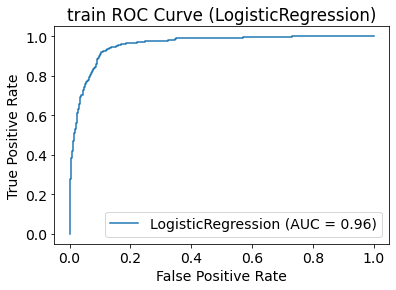

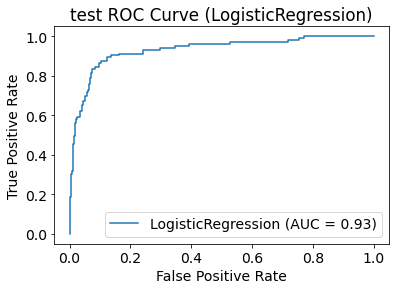


>>>>>>>>>>>>>>>>>>>>>>>>>>RandomForest model results <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3925
           1       0.99      0.92      0.95       403

    accuracy                           0.99      4328
   macro avg       0.99      0.96      0.97      4328
weighted avg       0.99      0.99      0.99      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       979
           1       0.70      0.55      0.62       103

    accuracy                           0.93      1082
   macro avg       0.82      0.76      0.79      1082
weighted avg       0.93      0.93      0.93      1082



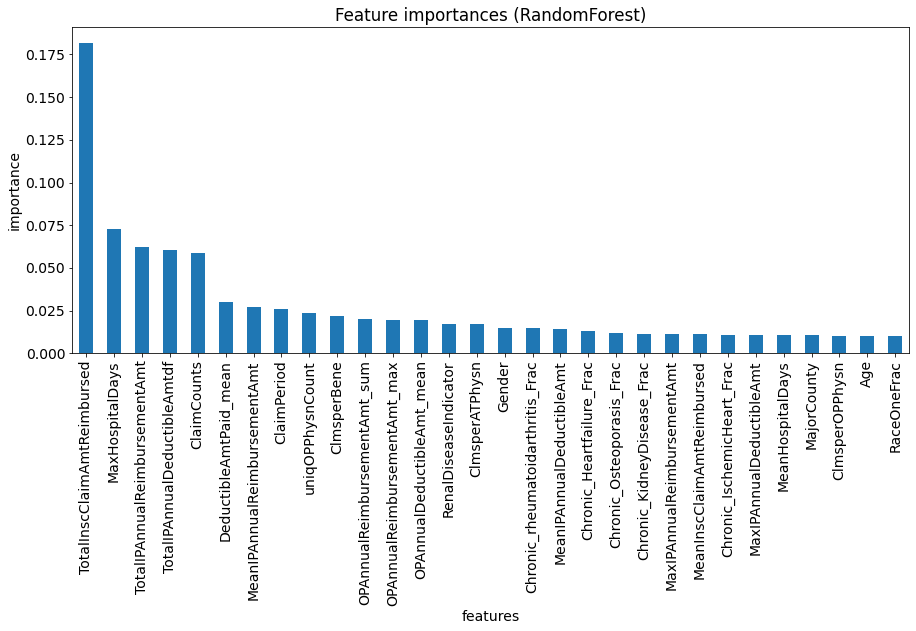

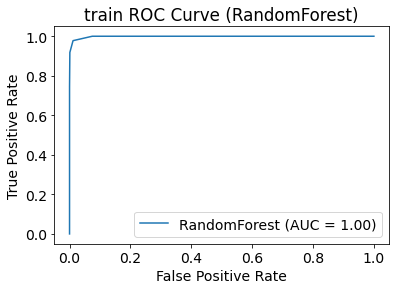

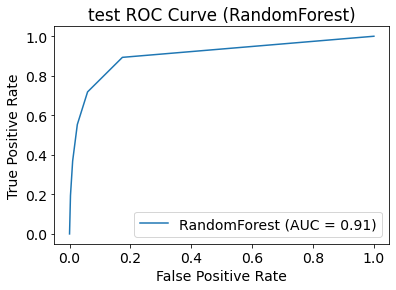


>>>>>>>>>>>>>>>>>>>>>>>>>>XGBClassifier model results <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3925
           1       0.96      0.80      0.87       403

    accuracy                           0.98      4328
   macro avg       0.97      0.90      0.93      4328
weighted avg       0.98      0.98      0.98      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       979
           1       0.65      0.50      0.56       103

    accuracy                           0.93      1082
   macro avg       0.80      0.73      0.76      1082
weighted avg       0.92      0.93      0.92      1082



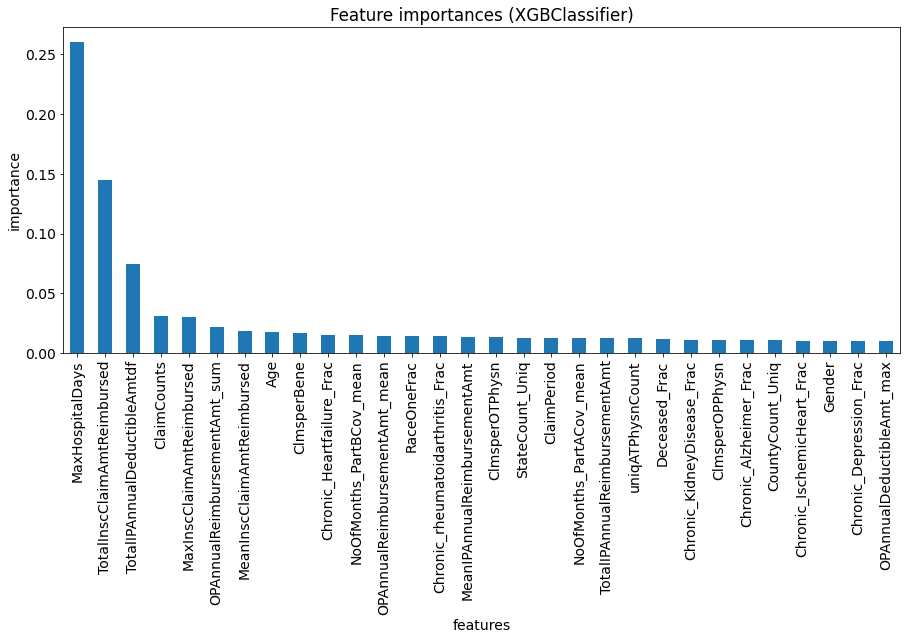

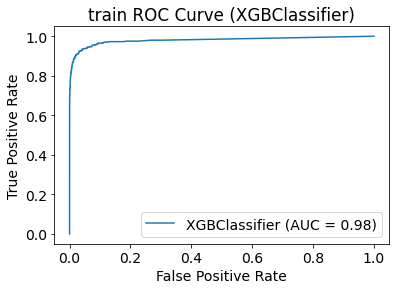

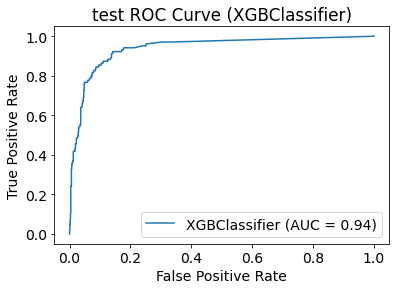


>>>>>>>>>>>>>>>>>>>>>>>>>>SVC model results <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


---------------------Train Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3925
           1       0.78      0.52      0.63       403

    accuracy                           0.94      4328
   macro avg       0.87      0.75      0.80      4328
weighted avg       0.94      0.94      0.94      4328

---------------------Test Classification Report--------------------------------

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       979
           1       0.76      0.54      0.63       103

    accuracy                           0.94      1082
   macro avg       0.86      0.76      0.80      1082
weighted avg       0.93      0.94      0.94      1082

feature importance not available


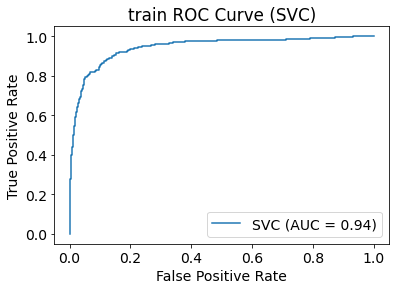

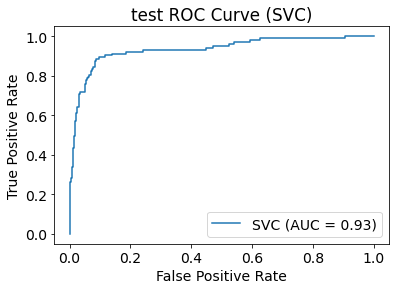

In [8]:
# use StandardScaler and Classification to build a classification pipeline.

classification_pipeline={}

for key,value in classification_models.items():

    classification_pipeline[key] = Pipeline([
        #('preprocessor',preprocessor),
        ('rescale', StandardScaler()),
        ('clf', value)
    ])
    
    classification_pipeline[key]=classification_pipeline[key].fit(X_train, y_train)
    
    
    # Use the predict function of the model to make predictions for the training set and test set,
    # and assign the outputs to y_train_pred and y_test_pred, respectively.

    y_train_pred = classification_pipeline[key].predict(X_train)
    y_test_pred = classification_pipeline[key].predict(X_test)
    
    print(f"\n\033[1m>>>>>>>>>>>>>>>>>>>>>>>>>>{key} model results <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<\033[0m\n\n")
    
#--------------------------------------Confusion Matrix---------------------------------------------
    
#     print('Training Accuracy Score: {0:.3f}'.format(accuracy_score(y_train, y_train_pred)))
#     print('Testinging Accuracy Score: {0:.3f}'.format(accuracy_score(y_test, y_test_pred)))
    print('---------------------Train Classification Report--------------------------------\n')
    print(classification_report(y_train, y_train_pred))
    print('---------------------Test Classification Report--------------------------------\n')
    print(classification_report(y_test, y_test_pred))

#--------------------------------------Feature Importance---------------------------------------------
    
    if key == 'RandomForest' or key == 'XGBClassifier':
        importances=classification_pipeline[key][1].feature_importances_
    elif key == 'LogisticRegression':
        importances=classification_pipeline[key][1].coef_[0]
    else:
        importances=classification_pipeline[key][1].coef_
    feature_names=classification_pipeline[key].feature_names_in_
    
    try:
        pd_Series_importances = (pd.Series(importances, index=feature_names)).sort_values(ascending=False)

        fig = plt.figure(figsize=(15,6))
        pd_Series_importances[:30].plot.bar()
        plt.title(f"Feature importances ({key})")
        plt.ylabel("importance")
        plt.xlabel("features")
        plt.show()
    except:
        print('feature importance not available')
    
#--------------------------------------Train ROC---------------------------------------------

    y_train_proba=classification_pipeline[key].predict_proba(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, y_train_proba[:,1])
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                      estimator_name=f'{key}')
    display.plot()

    plt.title(f'train ROC Curve ({key})')
    plt.show()
    
#     roc_auc_score_train = roc_auc_score(y_train, classification_pipeline[key].predict_proba(X_train)[:, 1])  
#     roc_auc_score_test = roc_auc_score(y_test, classification_pipeline[key].predict_proba(X_test)[:, 1])
#     print('roc_auc_score for the train dataset: {:.2f}'.format(roc_auc_score_train))
#     print('roc_auc_score for the test dataset: {:.2f}'.format(roc_auc_score_test))    

#--------------------------------------Test ROC---------------------------------------------

   
    y_test_proba=classification_pipeline[key].predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1])
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                      estimator_name=f'{key}')
    display.plot()

    plt.title(f'test ROC Curve ({key})')
    plt.show()
    
# #--------------------------------------Train PR---------------------------------------------

#     y_score = y_train_proba[:, 1]

#     # Data to plot precision - recall curve
#     precision, recall, thresholds = precision_recall_curve(y_train, y_score)
#     # Use AUC function to calculate the area under the curve of precision recall curve
#     auc_precision_recall = auc(recall, precision)
#     print('PR-AUC is {:.2f}'.format(auc_precision_recall))

#     # plot PR curve
#     fig = plt.figure(figsize=(6,6),dpi=60)
#     plt.plot(recall, precision,'o-')
#     plt.xlabel('Recall(Positive label:1)')
#     plt.ylabel('Precision(Positive label:1)')
#     plt.title(f'train Precision-Recall Curve ({key})')
#     plt.show()
    
#     train_pr_df=pd.DataFrame({'precision':precision[:-1], 'recall':recall[:-1], 'thresholds':thresholds})
#     fig = plt.figure(figsize=(6,6),dpi=60)
#     plt.plot(train_pr_df.thresholds,train_pr_df.precision,'o-',color='green',label='precision',alpha=0.3)
#     plt.plot(train_pr_df.thresholds,train_pr_df.recall,'o-',color='orange',label='recall',alpha=0.3)
#     plt.legend(loc='lower center')
#     plt.ylabel('scores')
#     plt.title(f'train Precision-Recall Curve ({key})')
#     plt.show()
        
# #--------------------------------------Test PR---------------------------------------------
    
#     y_score = y_test_proba[:, 1]

#     # Data to plot precision - recall curve
#     precision, recall, thresholds = precision_recall_curve(y_test, y_score)
#     # Use AUC function to calculate the area under the curve of precision recall curve
#     auc_precision_recall = auc(recall, precision)
#     print('PR-AUC is {:.2f}'.format(auc_precision_recall))

#     # plot PR curve
#     fig = plt.figure(figsize=(6,6),dpi=60)
#     plt.plot(recall, precision,'o-')
#     plt.xlabel('Recall(Positive label:1)')
#     plt.ylabel('Precision(Positive label:1)')
#     plt.title(f'test Precision-Recall Curve ({key})')
#     plt.show()
    
    
#     test_pr_df=pd.DataFrame({'precision':precision[:-1], 'recall':recall[:-1], 'thresholds':thresholds})
#     fig = plt.figure(figsize=(6,6),dpi=60)
#     plt.plot(test_pr_df.thresholds,test_pr_df.precision,'o-',color='green',label='precision')
#     plt.plot(test_pr_df.thresholds,test_pr_df.recall,'o-',color='orange',label='recall')
#     plt.legend(loc='lower center')
#     plt.ylabel('scores')
#     plt.title(f'test Precision-Recall Curve ({key})')
#     plt.show()

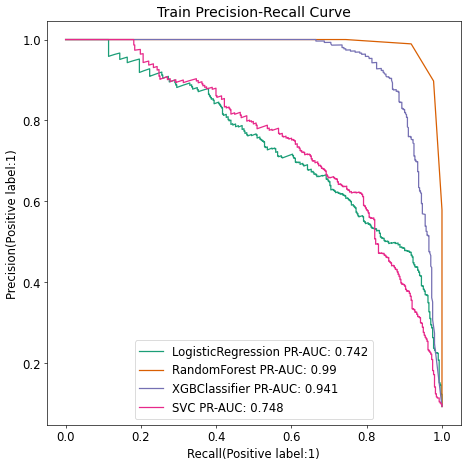

In [9]:
fig = plt.figure(figsize=(8,8),dpi=60)
colors = plt.cm.get_cmap("Dark2")
  
# Add line plots
i=0
for key in classification_pipeline.keys():
    y_train_proba=classification_pipeline[key].predict_proba(X_train) 
    y_score = y_train_proba[:, 1]

    # Data to plot precision - recall curve
    precision, recall, thresholds = precision_recall_curve(y_train, y_score)
    auc_precision_recall = auc(recall, precision)
    
    plt.plot(recall, precision,color=colors(i), label=f'{key} PR-AUC: {round(auc_precision_recall,3)}' )
    i+=1
    
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title(f'Train Precision-Recall Curve')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

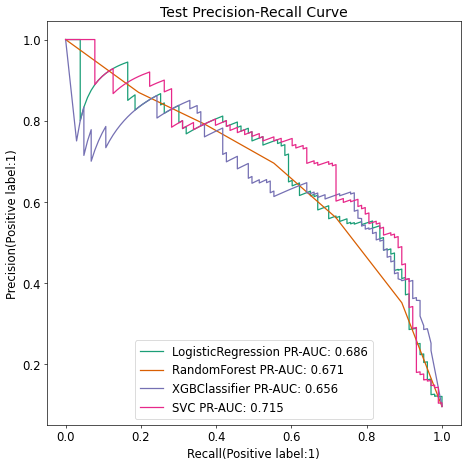

In [10]:
fig = plt.figure(figsize=(8,8),dpi=60)
colors = plt.cm.get_cmap("Dark2")
  
# Add line plots
i=0
for key in classification_pipeline.keys():
    y_test_proba=classification_pipeline[key].predict_proba(X_test) 
    y_score = y_test_proba[:, 1]

    # Data to plot precision - recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    auc_precision_recall = auc(recall, precision)
    
    plt.plot(recall, precision,color=colors(i), label=f'{key} PR-AUC: {round(auc_precision_recall,3)}' )
    i+=1
    
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title(f'Test Precision-Recall Curve')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

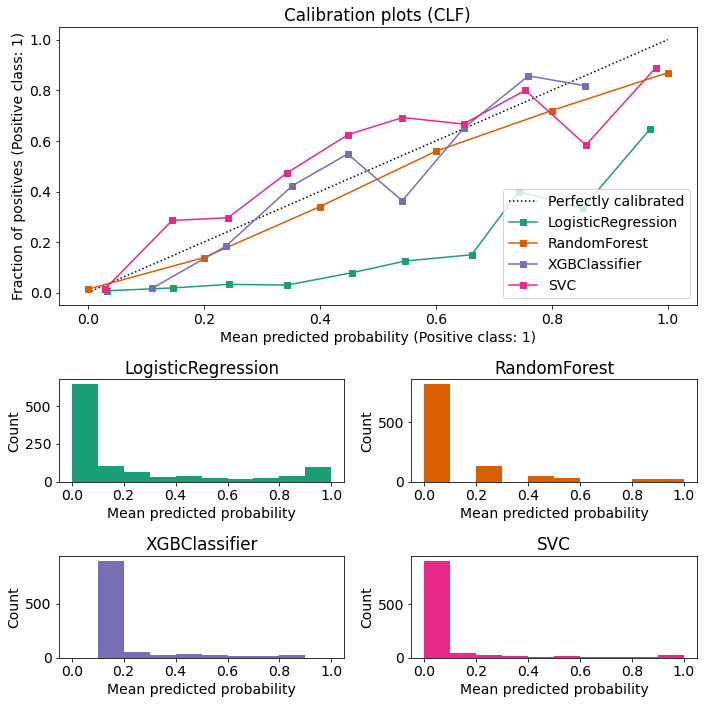

In [11]:
calibration_displays = {}

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")
i=0
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
for key in classification_pipeline.keys():
    classification_pipeline[key].fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        classification_pipeline[key],
        X_test,
        y_test,
        n_bins=10,
        name=key,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[key] = display
    i+=1
ax_calibration_curve.set_title("Calibration plots (CLF)")
    
# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
i=0
for key in classification_pipeline.keys():
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])
    ax.hist(
        calibration_displays[key].y_prob,
        range=(0, 1),
        bins=10,
        label=key,
        color=colors(i),
    )
    ax.set(title=key, xlabel="Mean predicted probability", ylabel="Count")
    i+=1
    
plt.tight_layout()
plt.show()